# Part I. Root-finding. Newton's iteration.

Write a function which performs Newton's iteration for a given function $f(x)$ with known derivative $f'(x)$. Your function should find the root of $f(x)$ with a predefined absolute accuracy $\epsilon$. 

In [80]:
def newton_iteration(f, fder, x0, eps=1e-5, maxiter=1000):
    """Find a root of $f(x) = 0$ via Newton's iteration starting from x0.
    
    Parameters
    ----------
    f : callable
        The function to find a root of.
    fder : callable
        The derivative of `f`.
    x0 : float
        Initial value for the Newton's iteration.
    eps : float
        The target accuracy. 
        The iteration stops when the distance between successive iterates is below `eps`.
        Default is 1e-5.
    maxiter : int
        The maximum number of iterations (default is 1000.)
        Iterations terminate if the number of iterations exceeds `maxiter`.
        This parameter is only needed to avoid infinite loops if iterations wander off.
        
    Returns
    -------
    x : float
        The estimate for the root.
    niter : int
        The number of iterations.
    """
    # ... ENTER YOUR CODE HERE ...
    niter = 0
    x1 = x0
    x2 = 0
    while abs(x2 - x1) > eps and niter <= maxiter:
        x2 = x1
        x1 = x2 - f(x2)/fder(x2)
        niter += 1  
    print(x1,niter)

### Test I.1 

Test your implementation on a simple example, $f(x) = x^2 - 1$ or similar. (20% of the total grade)

In [81]:
# ... ENTER YOUR CODE HERE ...
def f(x):
    return x**2-1
def fder(x):
    return 2*x    
x0_1 = [0.5, -1.5]
for x0 in x0_1:
    newton_iteration(lambda x: x**2-1, lambda x: 2*x, x0)     

1.000000000000001 5
-1.000000000013107 4


### Test I.2

Now consider a function which has a multiple root. Take $f(x) = (x^2 - 1)^2$ as an example. Implement a modified Newton's iteraion,

$$
x_{n+1} = x_{n} - m \frac{f(x_n)}{f'(x_n)}
$$

and vary $m= 1, 2, 3, 4, 5$. Check the number of iterations required for convergence within a fixed $\epsilon$. Are your observations consistent with the expectation that the convergence is quadratic is $m$ equals the multiplicity of the root, and is linear otherwise? (40% of the total grade)

In [82]:
# ... ENTER YOUR CODE HERE ...
def newton_iteration1(f1, fder1, x0, m, eps=1e-5, maxiter=1000):
    niter = 0
    x1 = x0
    x2 = 0
    while abs(x2 - x1) > eps and niter<=maxiter:
        x2 = x1
        x1 = x2 - m*f1(x2)/fder1(x2)
        niter += 1  
    print(x1, niter)   

In [83]:
def f1(x):
    return (x**2-1)**2
def fder1(x):
    return 4*x*(x**2-1)
x0 = 2
for i in range(1,6):
    newton_iteration1(f1, fder1, x0, m=i)

1.0000078296573287 18
1.000000000000001 5
0.9999978588127855 17
0.5 1001
-0.0018027133053619693 1001


Можно заметить, что наиболее точный результат и наименьшее количество итераций мы полумаем при m равном кратности корня.

# Part II. Fixed-point iteration

Consider the following equation:

$$
\sqrt{x} = \cos{x}
$$

Plot the left-hand side and right-hand side of this equation, and localize the root graphically. Estimate the location of the root by visual inspection of the plot.

Write a function which finds the solution using fixed-point iteration up to a predefined accuracy $\epsilon$. Compare the result to an estimate from a visual inspection.

Next, rewrite the fixed-point problem in the form

$$
x = x - \alpha f(x)
$$

where $\alpha$ is the free parameter. Check the dependence of the number of iterations required for a given $\epsilon$ on $\alpha$. Compare your results to an expectation that the optimal value of $\alpha$ is given by 

$$
\alpha = \frac{2}{m + M}
$$

where $0 < m < |f'(x)| < M$ over the localization interval. (40% of the total grade)

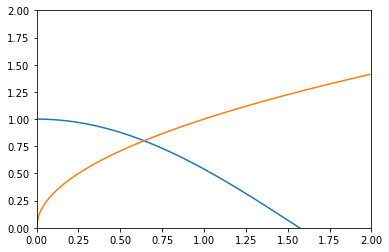

In [84]:
# ... ENTER YOUR CODE HERE ...
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(0, 2.0, 0.01)
fig = plt.figure(1)
plt.plot(x, np.cos(x))
plt.plot(x, (x)**(1/2))
plt.axis([0, 2, 0, 2])
plt.show()

In [87]:
def f2(x):
    return x**(1/2)-np.cos(x)

In [111]:
def fder2(x):
    return 1/2*x**(-1/2)+np.sin(x)

In [93]:
def newton_iteration2(f2, fder2, x0, alfa, eps=1e-5, maxiter=1000):
    niter = 0
    x1 = x0
    x2 = 0
    while abs(x2 - x1) > eps and niter<=maxiter:
        x2 = x1
        x1 = x2 - alfa_r[k]*f2(x2)
        niter += 1  
    return(x1,niter)

In [103]:
alfa_r = np.linspace(0.001, 1, 1000) 

l = [0]*len(alfa_r)
s = [0]*len(alfa_r)
for k in range(len(alfa_r)):
    s[k], l[k] = newton_iteration2(f2, fder2, 0.75, alfa_r[k])
niter_min = np.argmin(l)
print(s[niter_min], l[niter_min], alfa_r[niter_min])   

0.641714506570484 3 0.803


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in power
  """


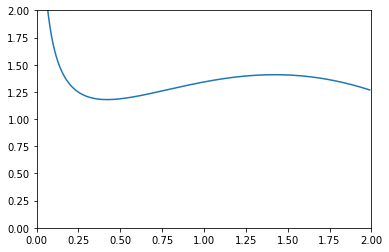

In [110]:
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(0, 2.0, 0.01)
fig = plt.figure(1)
fder3 = 1/2*x**(-1/2)+np.sin(x)
plt.plot(x, fder3)
plt.axis([0, 2, 0, 2])
plt.show()

По данному графику значения производной от x можно определить при каких x производная принимает минимальное и максимальное значения на отрезке, где находится решение.

In [114]:
alfa = 2/(fder2(0.5)+fder2(0.75))
x0 = 0.75
print(alfa)

0.8178215253834473


In [115]:
newton_iteration2(f2, fder2, x0, alfa)

(0.6417150688201742, 8)

Корень уравнения, полученный при данном вычислении почти совпадает с значением корня в прошлом случае.
Значение alfa также почти совпадают.

# Part III. Newton's fractal.

(Not graded). 

Consider the equation

$$
x^3 = 1
$$

It has three solutions in the complex plane, $x_k = \exp(i\, 2\pi k/ 3)$, $k = 0, 1, 2$.

The Newton's iterations converge to one of these solutions, depending on the starting point in the complex plane (to converge to a complex-valued solution, the iteration needs a complex-valued starting point).

Plot the \emph{basins of attraction} of these roots on the complex plane of $x$ (i.e., on the plane $\mathrm{Re}x$ -- $\mathrm{Im}x$). To this end, make a series of calculations, varying the initial conditions on a grid of points. 
Color the grid in three colors, according to the root, to which iterations converged.